# IMDB 긍정부정 임베딩

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
(x_train, train_label), (x_test, test_label)=imdb.load_data(num_words=10000) # 단어의 수 최초의 만개만 사용하겠다.
print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


In [2]:
# seq로 표현됨
print(x_train[0])
print(train_label[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
x_train=sequence.pad_sequences(x_train,maxlen=100) # 100개만 사용
x_test=sequence.pad_sequences(x_test,maxlen=100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding,Dropout
imdb=Sequential()
imdb.add(Embedding(10000,95,input_length=100))
imdb.add(Dropout(0.5))
imdb.add(Flatten())
imdb.add(Dropout(0.5))
imdb.add(Dense(1, activation='sigmoid'))
imdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 95)           950000    
                                                                 
 dropout (Dropout)           (None, 100, 95)           0         
                                                                 
 flatten (Flatten)           (None, 9500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 9500)              0         
                                                                 
 dense (Dense)               (None, 1)                 9501      
                                                                 
Total params: 959,501
Trainable params: 959,501
Non-trainable params: 0
_________________________________________________________________


In [4]:
imdb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
result=imdb.fit(x_train, train_label, epochs=10,batch_size=32, validation_split=0.15)

Epoch 1/10
665/665 [==============================] - 21s 29ms/step - loss: 0.6122 - acc: 0.6609 - val_loss: 0.4560 - val_acc: 0.7984
Epoch 2/10
665/665 [==============================] - 20s 31ms/step - loss: 0.3682 - acc: 0.8413 - val_loss: 0.3575 - val_acc: 0.8403
Epoch 3/10
665/665 [==============================] - 20s 30ms/step - loss: 0.2968 - acc: 0.8752 - val_loss: 0.3431 - val_acc: 0.8493
Epoch 4/10
665/665 [==============================] - 18s 27ms/step - loss: 0.2593 - acc: 0.8929 - val_loss: 0.3450 - val_acc: 0.8507
Epoch 5/10
665/665 [==============================] - 18s 27ms/step - loss: 0.2310 - acc: 0.9059 - val_loss: 0.3476 - val_acc: 0.8563
Epoch 6/10
665/665 [==============================] - 18s 27ms/step - loss: 0.2045 - acc: 0.9182 - val_loss: 0.3522 - val_acc: 0.8555
Epoch 7/10
665/665 [==============================] - 18s 27ms/step - loss: 0.1785 - acc: 0.9299 - val_loss: 0.3577 - val_acc: 0.8520
Epoch 8/10
665/665 [==============================] - 18s 27ms

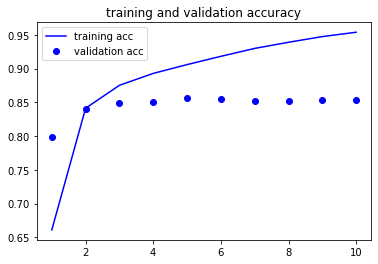

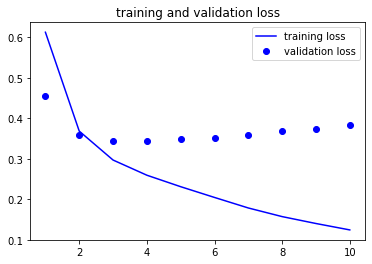

In [5]:
import matplotlib.pyplot as plt
acc=result.history['acc']
val_acc=result.history['val_acc']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

## 자료의 실수화

In [6]:
!pip install pyprind

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
import pyprind # 진행사항을 알려줌
import pandas as pd
import os
import numpy as np
imdb_dir='C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 7장 텍스트 자료분석/aclImdb'
labels={'pos':1, 'neg':0}
pbar=pyprind.ProgBar(50000) # 50000개의 텍스트 자료 진행 사항
df=pd.DataFrame()
for data_type in ('test', 'train'):
    for label_type in ('pos','neg'):
        path=os.path.join(imdb_dir,data_type,label_type)
        for file in os.listdir(path):
            with open(os.path.join(path,file),'r', encoding='utf-8') as infile:
                txt=infile.read()
            df=df.append([[txt,labels[label_type]]], ignore_index=True)
            pbar.update()
df.columns=['review', 'sentiment']
print(df.head())
print(df.shape)
df=df.reindex(np.random.permutation(df.index))

0% [##############################] 100% | ETA: 00:00:00

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1
(50000, 2)



Total time elapsed: 00:06:06


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

training_samples=25000
validation_samples=10000

max_words=10000 # 9999개의 단어
maxlen=100 # 각 표본의 길이 100

token=Tokenizer(num_words=max_words)
token.fit_on_texts(df['review'].values)
sequence=token.texts_to_sequences(df['review'].values) # 1~9999까지의 인덱스로 계열화
word_index=token.word_index # 인덱스를 dictionary 자료
print(len(word_index))
labels=df['sentiment'].values
data=pad_sequences(sequence, maxlen=maxlen)
print(data.shape)
print(labels.shape)

#np.random.shuffle(data) #pandas 데이터일 경우, data.sample(frac=1).reset_index(drop=True)
#np.random.shuffle(labels)
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples:training_samples+10000]
y_val=labels[training_samples:training_samples+10000]
x_test=data[training_samples+10000:]
y_test=labels[training_samples+10000:]

124252
(50000, 100)
(50000,)


# GLOVE 이전학습
: embedding 층을 GLOVE word embedding으로 대체

In [10]:
glove_dir='C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 7장 텍스트 자료분석/glove.6B'
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF8')
for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=seq
f.close
print(len(embedding_index)) # 400000개의 단어

400000


In [13]:
embedding_dim=100 # 글로브의 100차원
embedding_matrix=np.zeros((max_words,embedding_dim))
for word,i in word_index.items():
    if i<max_words:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten,Dropout
model_gl=Sequential()
model_gl.add(Embedding(max_words,embedding_dim,input_length=maxlen))
model_gl.add(Flatten())
model_gl.add(Dropout(0.3))
model_gl.add(Dense(1,activation='sigmoid'))
model_gl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dropout_2 (Dropout)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_gl.layers[0].set_weights([embedding_matrix]) # 첫번째 층을 이전학습 임베딩 행렬로 사용
model_gl.layers[0].trainable=False # 학습안함 글로브로 대체

In [17]:
model_gl.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gl_result=model_gl.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_val,y_val)) 

model_gl.save_weights('./glove_model.h5') # 추정된 모수가 저장된 모델 저장                

Epoch 1/20
782/782 [==============================] - 11s 13ms/step - loss: 0.7819 - acc: 0.6211 - val_loss: 0.8823 - val_acc: 0.5907
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 0.6373 - acc: 0.7018 - val_loss: 0.5878 - val_acc: 0.7142
Epoch 3/20
782/782 [==============================] - 10s 13ms/step - loss: 0.5975 - acc: 0.7232 - val_loss: 0.6196 - val_acc: 0.7052
Epoch 4/20
782/782 [==============================] - 10s 13ms/step - loss: 0.5792 - acc: 0.7337 - val_loss: 0.6980 - val_acc: 0.6787
Epoch 5/20
782/782 [==============================] - 10s 13ms/step - loss: 0.5746 - acc: 0.7403 - val_loss: 0.8864 - val_acc: 0.6315
Epoch 6/20
782/782 [==============================] - 10s 13ms/step - loss: 0.5721 - acc: 0.7434 - val_loss: 0.6624 - val_acc: 0.7010
Epoch 7/20
782/782 [==============================] - 10s 13ms/step - loss: 0.5706 - acc: 0.7438 - val_loss: 0.6422 - val_acc: 0.7104
Epoch 8/20
782/782 [==============================] - 10s 13ms

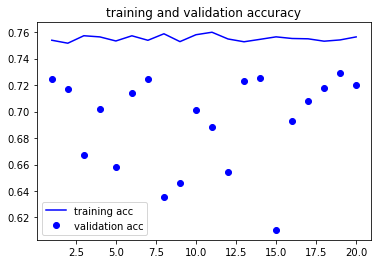

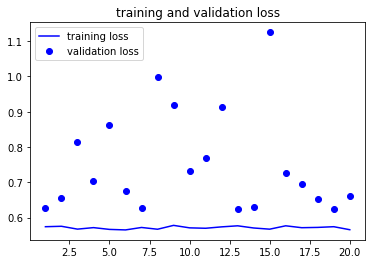

In [16]:
import matplotlib.pyplot as plt
acc=gl_result.history['acc']
val_acc=gl_result.history['val_acc']
loss=gl_result.history['loss']
val_loss=gl_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [17]:
loss,acc=model_gl.evaluate(x_test,y_test)
print(loss)
print(acc)

469/469 [==============================] - 0s 830us/step - loss: 0.6552 - acc: 0.7168
0.6552268266677856
0.7167999744415283


+ 모델 불러와 test 성능 구하는 방법

In [25]:
model_gl.load_weights('C:/Users/ellyj/Desktop/3-1/고급통계적딥러닝/코드 및 데이터_1/제 7장 텍스트 자료분석/glove_model.h5')
loss, acc = model_gl.evaluate(x_test, y_test)

469/469 [==============================] - 2s 4ms/step - loss: 0.7437 - acc: 0.6945
